In [3]:
!pip install factor-analyzer

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('Data\\Tomato\\prepare\\data6.csv')

In [65]:
df.shape

(89, 9)

In [66]:
df.head()

,Unnamed: 0,수집일,내부CO2(ppm),내부습도(%),외부온도(도),내부온도(도),내부질소(t ha-1),내부인(t ha-1),열매수
0,0,2017-03-12,380.00,88.63,6.96,17.96,4.96,332.54,13
1,1,2017-03-19,379.46,93.13,7.88,17.92,5.65,381.02,13
2,2,2017-03-26,378.96,96.83,7.13,15.96,3.02,176.58,19
3,3,2017-04-02,380.00,93.79,8.54,18.00,5.26,332.28,13
4,4,2017-04-09,380.00,87.54,16.29,20.71,2.99,166.58,19


In [67]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [68]:
df.columns

Index(['수집일', '내부CO2(ppm)', '내부습도(%)', '외부온도(도)', '내부온도(도)', '내부질소(t ha-1)',
       '내부인(t ha-1)', '열매수'],
      dtype='object')

In [69]:
from factor_analyzer import FactorAnalyzer

In [70]:
items = df.columns.tolist()[1:]
items.sort()

In [71]:
items

['내부CO2(ppm)',
 '내부습도(%)',
 '내부온도(도)',
 '내부인(t ha-1)',
 '내부질소(t ha-1)',
 '열매수',
 '외부온도(도)']

In [72]:
fa = FactorAnalyzer(n_factors=6, method="ml", rotation="promax")
fa.fit(df[items])

FactorAnalyzer(method='ml', n_factors=6, rotation_kwargs={})

In [73]:
efa_result= pd.DataFrame(fa.loadings_, index=items)

In [74]:
print(efa_result)

                     0         1         2         3         4         5
내부CO2(ppm)   -0.013174 -0.001032 -0.005465  0.584781 -0.023666  0.009052
내부습도(%)       0.049426  0.679777 -0.002024  0.167323  0.111578  0.298361
내부온도(도)      -0.035528  1.028376  0.007301 -0.061854 -0.068797 -0.028679
내부인(t ha-1)   0.969580 -0.021466  0.002080 -0.107862 -0.118200  0.185307
내부질소(t ha-1)  1.006422  0.007851 -0.000783  0.040200  0.119586 -0.134754
열매수          -0.600778 -0.009591  0.000463 -0.052682  0.352035  0.022888
외부온도(도)       0.000334  0.000615  0.994672 -0.005855  0.000638 -0.000250


In [75]:
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (30, 10)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


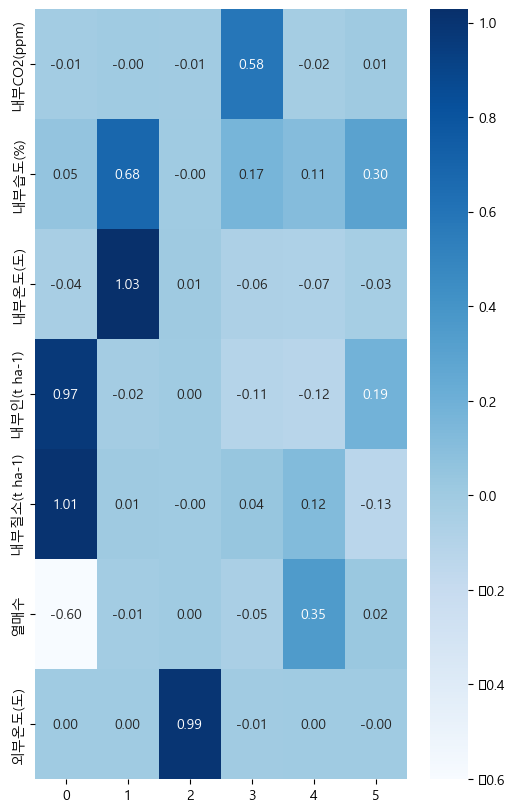

In [76]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [77]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [78]:
factors = ['a', 'b', 'c']
factors_items_dict = {}

for factor in factors:
    factors_items_dict[factor] = [x for x in items if x[0] == factor]

In [33]:
for key, value in factors_items_dict.items():
    print(key)
    factor_data = df[value]

    # 결측치 처리: 평균값으로 대체
    factor_data_filled = factor_data.fillna(factor_data.mean())

    print(CronbachAlpha(factor_data_filled))
    print()

a
nan

b
nan

c
nan



C:\Users\user\AppData\Local\Temp\ipykernel_13328\4179328243.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))
C:\Users\user\AppData\Local\Temp\ipykernel_13328\4179328243.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))
C:\Users\user\AppData\Local\Temp\ipykernel_13328\4179328243.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))


In [38]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_13328\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,내부CO2(ppm),내부습도(%),외부온도(도),내부온도(도),내부질소(t ha-1),내부인(t ha-1),생장길이(cm),열매수
내부CO2(ppm),1.000000,0.413714,-0.280730,0.128293,-0.159463,-0.165706,-0.207094,0.195367
내부습도(%),0.413714,1.000000,-0.123974,0.796705,-0.255359,-0.269086,0.138017,0.331082
외부온도(도),-0.280730,-0.123974,1.000000,0.379454,-0.021115,-0.035813,-0.001167,-0.139757
내부온도(도),0.128293,0.796705,0.379454,1.000000,-0.248818,-0.250470,0.123716,0.190251
내부질소(t ha-1),-0.159463,-0.255359,-0.021115,-0.248818,1.000000,0.975045,-0.000498,-0.659952
내부인(t ha-1),-0.165706,-0.269086,-0.035813,-0.250470,0.975045,1.000000,0.020116,-0.699025
생장길이(cm),-0.207094,0.138017,-0.001167,0.123716,-0.000498,0.020116,1.000000,0.011572
열매수,0.195367,0.331082,-0.139757,0.190251,-0.659952,-0.699025,0.011572,1.000000


In [79]:
import scipy.stats as st
import seaborn as sns

df2 = df
df2

,수집일,내부CO2(ppm),내부습도(%),외부온도(도),내부온도(도),내부질소(t ha-1),내부인(t ha-1),열매수
0,2017-03-12,380.00,88.63,6.96,17.96,4.96,332.54,13
1,2017-03-19,379.46,93.13,7.88,17.92,5.65,381.02,13
2,2017-03-26,378.96,96.83,7.13,15.96,3.02,176.58,19
3,2017-04-02,380.00,93.79,8.54,18.00,5.26,332.28,13
4,2017-04-09,380.00,87.54,16.29,20.71,2.99,166.58,19
...,...,...,...,...,...,...,...,...
84,2022-05-04,582.21,78.79,15.43,17.54,4.39,285.38,13
85,2022-05-11,672.13,94.79,18.29,20.17,3.25,206.19,16
86,2022-05-18,621.50,89.08,20.33,21.13,3.92,228.24,14
87,2022-05-25,621.25,98.63,21.46,22.42,4.42,235.21,13


In [81]:
df2.columns = ['수집일', '내부CO2(ppm)', '내부습도(%)', '외부온도(도)', '내부온도(도)', '내부질소(t ha-1)',
       '내부인(t ha-1)', 'number']

In [82]:
df2

,수집일,내부CO2(ppm),내부습도(%),외부온도(도),내부온도(도),내부질소(t ha-1),내부인(t ha-1),number
0,2017-03-12,380.00,88.63,6.96,17.96,4.96,332.54,13
1,2017-03-19,379.46,93.13,7.88,17.92,5.65,381.02,13
2,2017-03-26,378.96,96.83,7.13,15.96,3.02,176.58,19
3,2017-04-02,380.00,93.79,8.54,18.00,5.26,332.28,13
4,2017-04-09,380.00,87.54,16.29,20.71,2.99,166.58,19
...,...,...,...,...,...,...,...,...
84,2022-05-04,582.21,78.79,15.43,17.54,4.39,285.38,13
85,2022-05-11,672.13,94.79,18.29,20.17,3.25,206.19,16
86,2022-05-18,621.50,89.08,20.33,21.13,3.92,228.24,14
87,2022-05-25,621.25,98.63,21.46,22.42,4.42,235.21,13


In [83]:
target = {}
for c in df.number:
    if c not in target: 
        target[c] = 1 
    else:
        target[c] +=1  
print(target)
entropy_before = st.entropy(list(target.values()), base=2)
print(entropy_before)

{13: 9, 19: 2, 16: 6, 14: 8, 17: 4, 15: 4, 18: 1, 393: 1, 63: 1, 38: 1, 54: 1, 75: 1, 125: 1, 84: 1, 55: 1, 115: 1, 119: 1, 113: 1, 164: 1, 101: 2, 7: 2, 20: 1, 31: 1, 45: 1, 61: 1, 97: 2, 116: 1, 130: 1, 157: 1, 169: 1, 163: 1, 127: 1, 149: 1, 134: 1, 126: 1, 117: 1, 11: 4, 10: 2, 12: 2, 3: 1, 6: 1, 25: 1, 36: 1, 47: 1, 50: 1, 68: 3, 62: 1, 65: 1, 89: 1, 76: 1, 82: 1, 9: 1}
5.253329076815037


In [63]:
# Information Gain 계산 
from collections import Counter

def weightedEntropy(feature):    
    
    train = df[['number',feature]].groupby(feature).agg({'number': lambda x: list(x)})
    train['Count'] = [len(i) for i in train['number']]
    train.reset_index([feature], inplace=True)
    
    print("")
    print("booking_status grouped by %s"%feature)
    display(train)

    TotalCount = sum(train.Count)

    weightedEntropy = 0 
    for i in range(train.shape[0]):
        sd  = train.iloc[i].number
        cnt = train.iloc[i].Count
        weightedEntropy += st.entropy(list(Counter(sd).values()), base=2)*cnt/TotalCount
        
    return weightedEntropy

IG={}

for feature in df2.columns[:-1]:
    IG[feature] = entropy_before - weightedEntropy(feature)

for a in IG:
    print(a , " : ", IG[a])


booking_status grouped by 내부CO2(ppm)


,내부CO2(ppm),number,Count
0,370.38,[11],1
1,371.71,[12],1
2,375.92,[6],1
3,378.58,[68],1
4,378.96,[19],1
...,...,...,...
73,784.96,[16],1
74,787.63,[11],1
75,827.42,[75],1
76,925.71,[38],1



booking_status grouped by 내부습도(%)


,내부습도(%),number,Count
0,24.67,[47],1
1,25.79,[50],1
2,25.83,[68],1
3,26.83,"[17, 14]",2
4,26.88,[25],1
...,...,...,...
76,97.25,[116],1
77,98.42,[68],1
78,98.63,[13],1
79,99.75,[393],1



booking_status grouped by 외부온도(도)


,외부온도(도),number,Count
0,-5.38,[84],1
1,-2.82,[10],1
2,-2.52,[13],1
3,-2.17,[55],1
4,-2.12,[13],1
...,...,...,...
80,21.47,[68],1
81,21.61,[76],1
82,21.63,[14],1
83,23.26,[82],1



booking_status grouped by 내부온도(도)


,내부온도(도),number,Count
0,9.50,[3],1
1,10.08,[13],1
2,10.57,[10],1
3,10.58,"[12, 13]",2
4,10.67,[13],1
...,...,...,...
66,21.33,[18],1
67,21.63,[15],1
68,21.83,[17],1
69,22.42,"[13, 16]",2



booking_status grouped by 내부질소(t ha-1)


,내부질소(t ha-1),number,Count
0,1.82,[163],1
1,1.85,[393],1
2,1.92,[169],1
3,1.93,[164],1
4,1.97,[157],1
...,...,...,...
76,6.36,[10],1
77,6.48,[7],1
78,6.59,[7],1
79,6.79,[3],1



booking_status grouped by 내부인(t ha-1)


,내부인(t ha-1),number,Count
0,50.30,[393],1
1,50.45,[169],1
2,63.69,[164],1
3,63.72,[163],1
4,64.20,[149],1
...,...,...,...
78,398.10,[9],1
79,398.19,[7],1
80,398.23,[6],1
81,398.30,[7],1



booking_status grouped by 생장길이(cm)


,생장길이(cm),number,Count
0,13,[82],1
1,18,"[97, 76]",2
2,20,"[68, 68]",2
3,28,[17],1
4,36,[16],1
...,...,...,...
68,903,[7],1
69,2624,[19],1
70,2861,[14],1
71,3063,"[101, 101]",2


내부CO2(ppm)  :  4.882322896942521
내부습도(%)  :  5.07355379591616
외부온도(도)  :  5.1634414363655985
내부온도(도)  :  4.8318709306990035
내부질소(t ha-1)  :  5.08754382398174
내부인(t ha-1)  :  5.118497616140879
생장길이(cm)  :  4.935748599214021


In [58]:
df2.drop(['수집일'], axis=1, inplace=True)

In [59]:
df2

,내부CO2(ppm),내부습도(%),외부온도(도),내부온도(도),내부질소(t ha-1),내부인(t ha-1),생장길이(cm),number
0,389.00,90.92,12.33,17.92,2.60,101.49,3063,101
1,403.33,94.00,13.17,17.33,2.56,72.01,3063,101
2,419.04,83.96,2.54,17.13,6.59,398.19,903,7
3,452.67,87.42,-0.92,15.54,3.01,163.54,328,20
4,430.88,91.50,0.79,15.71,2.97,155.55,177,31
...,...,...,...,...,...,...,...,...
84,681.42,92.25,-2.17,14.38,2.93,139.17,55,55
85,660.67,90.25,1.83,14.88,2.53,97.65,115,115
86,658.38,88.83,5.04,16.29,2.51,89.69,119,119
87,712.83,91.75,12.58,16.83,2.67,97.82,113,113


In [84]:
df2.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_13328\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,내부CO2(ppm),내부습도(%),외부온도(도),내부온도(도),내부질소(t ha-1),내부인(t ha-1),number
내부CO2(ppm),1.000000,0.413714,-0.280730,0.128293,-0.159463,-0.165706,0.195367
내부습도(%),0.413714,1.000000,-0.123974,0.796705,-0.255359,-0.269086,0.331082
외부온도(도),-0.280730,-0.123974,1.000000,0.379454,-0.021115,-0.035813,-0.139757
내부온도(도),0.128293,0.796705,0.379454,1.000000,-0.248818,-0.250470,0.190251
내부질소(t ha-1),-0.159463,-0.255359,-0.021115,-0.248818,1.000000,0.975045,-0.659952
내부인(t ha-1),-0.165706,-0.269086,-0.035813,-0.250470,0.975045,1.000000,-0.699025
number,0.195367,0.331082,-0.139757,0.190251,-0.659952,-0.699025,1.000000
